# Chapter 6 - Odds and Addends
http://allendowney.github.io/ThinkBayes2/chap06.html

## Reading

In [4]:
from utils import set_pyplot_params
set_pyplot_params()

### Odds

In [1]:
def odds(p):
    return p / (1 - p)

In [2]:
def prob(o):
    return o / (o + 1)

In [3]:
def prob2(yes, no):
    return yes / (yes + no)

### Bayes's Rule

$$\mathrm{odds}(A|D) = \mathrm{odds}(A)~\frac{P(D|A)}{P(D|B)}$$

This is Bayes's Rule, which says that the posterior odds are the prior odds times the likelihood ratio.
Bayes's Rule is convenient for computing a Bayesian update on paper or in your head.

#### Oliver's blood

> Two people have left traces of their own blood at the scene of a crime. A suspect, Oliver, is tested and found to have type ‘O’ blood. The blood groups of the two traces are found to be of type ‘O’ (a common type in the local population, having frequency 60%) and of type ‘AB’ (a rare type, with frequency 1%). Do these data \[the traces found at the scene\] give evidence in favor of the proposition that Oliver was one of the people \[who left blood at the scene\]?

If Oliver left blood at the scene of the crime, the probability of the data is the probability that the other person, a member of the local population, has type 'AB' blood.

If Oliver did not leave blood at the scene of the crime, the probability of the data is the probability that when choosing any two members of the local population, one has 'AB' blood and the other has 'O' blood.

In [5]:
like1 = 0.01
like2 = 2 * 0.6 * 0.01

likelihood_ratio = like1 / like2
likelihood_ratio

0.8333333333333334

In [6]:
post_odds = 1 * like1 / like2
prob(post_odds)

0.45454545454545453

**Exercise:** Suppose that based on other evidence, you prior belief in Oliver's guilt is 90%.  How much would the blood evidence in this section change your beliefs?  What if you initially thought there was only a 10% chance of his guilt?

In [7]:
# Prior belief is 90% chance of guilt
post_odds = odds(0.9) * like1 / like2
prob(post_odds)

0.8823529411764706

In [8]:
# Prior belief is 10% chance of guilt
post_odds = odds(0.1) * like1 / like2
prob(post_odds)

0.0847457627118644

### Addends

In [9]:
import numpy as np
from empiricaldist import Pmf

def make_die(sides):
    outcomes = np.arange(1, sides+1)
    die = Pmf(1/sides, outcomes)
    return die

In [10]:
die = make_die(6)

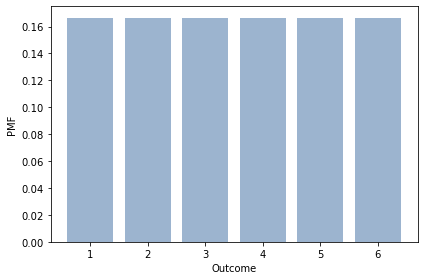

In [11]:
from utils import decorate

die.bar(alpha=0.4)
decorate(xlabel='Outcome',
         ylabel='PMF')

In [12]:
def add_dist(pmf1, pmf2):
    """Compute the distribution of a sum."""
    res = Pmf()
    for q1, p1 in pmf1.items():
        for q2, p2 in pmf2.items():
            q = q1 + q2
            p = p1 * p2
            res[q] = res(q) + p
    return res

In [13]:
twice = die.add_dist(die)

In [14]:
from utils import decorate

def decorate_dice(title=''):
    decorate(xlabel='Outcome',
             ylabel='PMF',
             title=title)

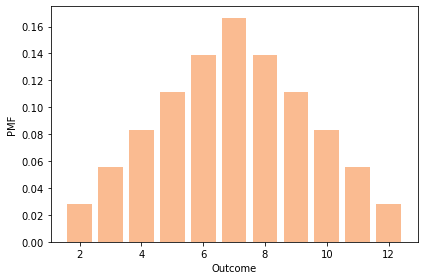

In [15]:
twice = add_dist(die, die)
twice.bar(color='C1', alpha=0.5)
decorate_dice()

In [16]:
def add_dist_seq(seq):
    """Compute Pmf of the sum of values from seq."""
    total = seq[0]
    for other in seq[1:]:
        total = total.add_dist(other)
    return total

In [17]:
dice = [die] * 3

In [18]:
thrice = add_dist_seq(dice)

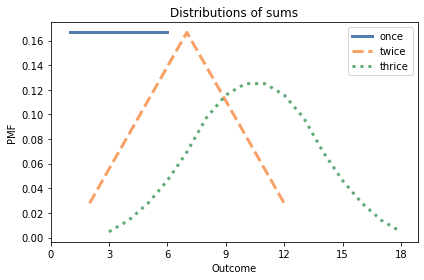

In [19]:
import matplotlib.pyplot as plt

die.plot(label='once')
twice.plot(label='twice', style='--')
thrice.plot(label='thrice', style=':')

plt.xticks([0,3,6,9,12,15,18])
decorate_dice(title='Distributions of sums')

### Gluten sensitivity

Modeling decisions:
Assume people who are sensitive to gluten have a 95% chance of correctly identifying gluten flour. Assume people who are not sensitive have a 40% chance of identifying the gluten flour by chance.

#### Forward problem
Given the number of sensitive subjects, we can compute the distribution of the data.

Suppose we know that 10 of the 35 subjects are sensitive to gluten.

In [20]:
n = 35
num_sensitive = 10
num_insensitive = n - num_sensitive

In [21]:
from utils import make_binomial

dist_sensitive = make_binomial(num_sensitive, 0.95)
dist_insensitive = make_binomial(num_insensitive, 0.40)

dist_total = Pmf.add_dist(dist_sensitive, dist_insensitive)

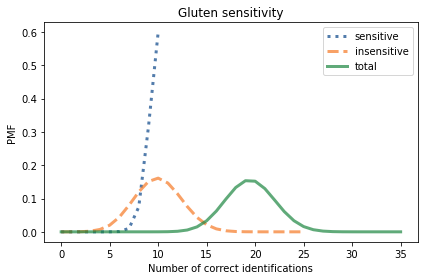

In [22]:
dist_sensitive.plot(label='sensitive', style=':')
dist_insensitive.plot(label='insensitive', style='--')
dist_total.plot(label='total')

decorate(xlabel='Number of correct identifications',
         ylabel='PMF',
         title='Gluten sensitivity')

#### Inverse problem
Given the data, we'll compute the posterior distribution of the number of sensitive subjects.

In [23]:
import pandas as pd

table = pd.DataFrame()
for num_sensitive in range(n+1):
    num_insensitive = n - num_sensitive
    dist_sensitive = make_binomial(num_sensitive, 0.95)
    dist_insensitive = make_binomial(num_insensitive, 0.4)
    dist_total = Pmf.add_dist(dist_sensitive, dist_insensitive)
    table[num_sensitive] = dist_total

In [24]:
table.head(3)

,0,1,2,3,4,5,6,7,8,9,...,26,27,28,29,30,31,32,33,34,35
0,1.719071e-08,1.432559e-09,1.193799e-10,9.948326e-12,8.290272e-13,6.908560e-14,5.757133e-15,4.797611e-16,3.998009e-17,3.331674e-18,...,1.501694e-36,1.251411e-37,1.042843e-38,8.690357e-40,7.241964e-41,6.034970e-42,5.029142e-43,4.190952e-44,3.492460e-45,2.910383e-46
1,4.011165e-07,5.968996e-08,7.162795e-09,7.792856e-10,8.013930e-11,7.944844e-12,7.676178e-13,7.276377e-14,6.796616e-15,6.274653e-16,...,7.508469e-34,6.486483e-35,5.596590e-36,4.823148e-37,4.152060e-38,3.570691e-39,3.067777e-40,2.633315e-41,2.258457e-42,1.935405e-43
2,4.545987e-06,9.741401e-07,1.709122e-07,2.506426e-08,3.269131e-09,3.940182e-10,4.490244e-11,4.908756e-12,5.197412e-13,5.365476e-14,...,1.806613e-31,1.620070e-32,1.449030e-33,1.292922e-34,1.151034e-35,1.022555e-36,9.066202e-38,8.023344e-39,7.088005e-40,6.251357e-41


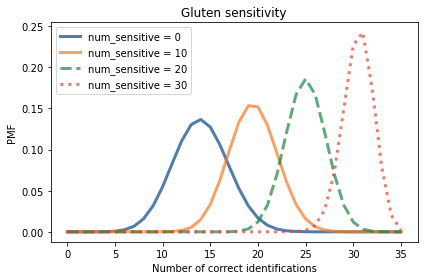

In [25]:
table[0].plot(label='num_sensitive = 0')
table[10].plot(label='num_sensitive = 10')
table[20].plot(label='num_sensitive = 20', style='--')
table[30].plot(label='num_sensitive = 30', style=':')
    
decorate(xlabel='Number of correct identifications',
         ylabel='PMF',
         title='Gluten sensitivity')

In [26]:
likelihood1 = table.loc[12]

In [28]:
likelihood1

0     1.105605e-01
1     9.608232e-02
2     7.965245e-02
3     6.270212e-02
4     4.662672e-02
5     3.256040e-02
6     2.120994e-02
7     1.279154e-02
8     7.083554e-03
9     3.570425e-03
10    1.623937e-03
11    6.615772e-04
12    2.403445e-04
13    7.789399e-05
14    2.264999e-05
15    5.963394e-06
16    1.436429e-06
17    3.197853e-07
18    6.641264e-08
19    1.297218e-08
20    2.400043e-09
21    4.231622e-10
22    7.147234e-11
23    1.161589e-11
24    1.823564e-12
25    2.774510e-13
26    4.103002e-14
27    5.912350e-15
28    8.319923e-16
29    1.145573e-16
30    1.546022e-17
31    2.048146e-18
32    2.667160e-19
33    3.418286e-20
34    4.316326e-21
35    5.375200e-22
Name: 12, dtype: float64

This is the row with index 12, which contains the probability of 12 correct identifications for each hypothetical value of `num_sensitive`.

In [29]:
# Uniform prior
hypos = np.arange(n+1)
prior = Pmf(1, hypos)

In [31]:
posterior1 = prior * likelihood1
posterior1.normalize()

0.4754741648615133

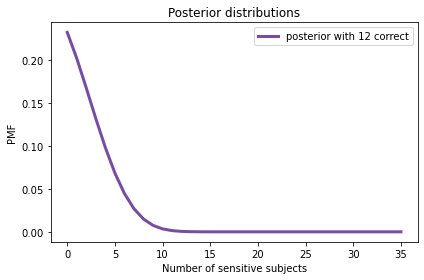

In [32]:
posterior1.plot(label='posterior with 12 correct', color='C4')
decorate(xlabel='Number of sensitive subjects',
         ylabel='PMF',
         title='Posterior distributions')

In [33]:
posterior1.max_prob()

0

In [34]:
posterior1.mean()

2.3686989069839957

## Exercises

**Exercise:** Let's use Bayes's Rule to solve the Elvis problem from <<_Distributions>>:

> Elvis Presley had a twin brother who died at birth. What is the probability that Elvis was an identical twin?

In 1935, about 2/3 of twins were fraternal and 1/3 were identical.
The question contains two pieces of information we can use to update this prior.

* First, Elvis's twin was also male, which is more likely if they were identical twins, with a likelihood ratio of 2.

* Also, Elvis's twin died at birth, which is more likely if they were identical twins, with a likelihood ratio of 1.25.

If you are curious about where those numbers come from, I wrote [a blog post about it](https://www.allendowney.com/blog/2020/01/28/the-elvis-problem-revisited).

In [36]:
prior_odds = odds(1/3)
posterior1 = prior_odds * 2
prob(posterior1)

0.49999999999999994

In [37]:
posterior2 = posterior1 * 1.25
prob(posterior2)

0.5555555555555555

**Exercise:** The following is an [interview question that appeared on glassdoor.com](https://www.glassdoor.com/Interview/You-re-about-to-get-on-a-plane-to-Seattle-You-want-to-know-if-you-should-bring-an-umbrella-You-call-3-random-friends-of-y-QTN_519262.htm), attributed to Facebook:

> You're about to get on a plane to Seattle. You want to know if you should bring an umbrella. You call 3 random friends of yours who live there and ask each independently if it's raining. Each of your friends has a 2/3 chance of telling you the truth and a 1/3 chance of messing with you by lying. All 3 friends tell you that "Yes" it is raining. What is the probability that it's actually raining in Seattle?

Use Bayes's Rule to solve this problem.  As a prior you can assume that it rains in Seattle about 10% of the time.

This question causes some confusion about the differences between Bayesian and frequentist interpretations of probability; if you are curious about this point, [I wrote a blog article about it](http://allendowney.blogspot.com/2016/09/bayess-theorem-is-not-optional.html).

In [38]:
prior = odds(1/10)

Likelihood ratio: probability that friend says it is raining given that it is raining / probability that friend says it is raining given that it is not raining.

In [39]:
likelihood_ratio = (2 / 3) / (1 / 3)

In [40]:
posterior = prior * (likelihood_ratio)**3
prob(posterior)

0.4705882352941177

**Exercise:** [According to the CDC](https://www.cdc.gov/tobacco/data_statistics/fact_sheets/health_effects/effects_cig_smoking), people who smoke are about 25 times more likely to develop lung cancer than nonsmokers.

[Also according to the CDC](https://www.cdc.gov/tobacco/data_statistics/fact_sheets/adult_data/cig_smoking/index.htm), about 14\% of adults in the U.S. are smokers.
If you learn that someone has lung cancer, what is the probability they are a smoker?

---
$\text{odds}(S | LC) = \text{odds}(S) \frac{P(LC | S)}{P(LC | NS)}$

In [41]:
likelihood_factor = 25
prob_s = 0.14

In [42]:
odds_s_lc = odds(prob_s) * likelihood_factor
prob(odds_s_lc)

0.8027522935779816

**Exercise:** In *Dungeons & Dragons*, the amount of damage a goblin can withstand is the sum of two six-sided dice. The amount of damage you inflict with a short sword is determined by rolling one six-sided die.
A goblin is defeated if the total damage you inflict is greater than or equal to the amount it can withstand.

Suppose you are fighting a goblin and you have already inflicted 3 points of damage. What is your probability of defeating the goblin with your next successful attack?

Hint: You can use `Pmf.add_dist` to add a constant amount, like 3, to a `Pmf` and `Pmf.sub_dist` to compute the distribution of remaining points.

In [65]:
pmf_goblin_health = Pmf.add_dist(make_die(6), make_die(6))
pmf_goblin_health

,probs
2,0.027778
3,0.055556
4,0.083333
5,0.111111
6,0.138889
7,0.166667
8,0.138889
9,0.111111
10,0.083333
11,0.055556


In [66]:
pmf_total_damage = Pmf.add_dist(make_die(6), 3)
pmf_goblin_health = pmf_goblin_health.sub_dist(pmf_total_damage)
pmf_goblin_health.normalize()
pmf_goblin_health

,probs
-7,0.004630
-6,0.013889
-5,0.027778
-4,0.046296
-3,0.069444
-2,0.097222
-1,0.115741
0,0.125000
1,0.125000
2,0.115741


In [67]:
pmf_goblin_health.prob_le(0)

0.5

**Exercise:** Suppose I have a box with a 6-sided die, an 8-sided die, and a 12-sided die.
I choose one of the dice at random, roll it twice, multiply the outcomes, and report that the product is 12.
What is the probability that I chose the 8-sided die?

Hint: `Pmf` provides a function called `mul_dist` that takes two `Pmf` objects and returns a `Pmf` that represents the distribution of the product.

In [70]:
hypos = [6, 8, 12]
prior = Pmf(1, hypos)
prior.normalize()
prior

,probs
6,0.333333
8,0.333333
12,0.333333


In [71]:
likelihood = []
for hypo in hypos:
    die = make_die(hypo)
    pmf_prod = Pmf.mul_dist(die, die)
    likelihood.append(pmf_prod[12])
    
likelihood

[0.1111111111111111, 0.0625, 0.041666666666666664]

In [74]:
posterior = prior * likelihood
posterior.normalize()

0.07175925925925924

In [75]:
posterior

,probs
6,0.516129
8,0.290323
12,0.193548


**Exercise:** *Betrayal at House on the Hill* is a strategy game in which characters with different attributes explore a haunted house.  Depending on their attributes, the characters roll different numbers of dice.  For example, if attempting a task that depends on knowledge, Professor Longfellow rolls 5 dice, Madame Zostra rolls 4, and Ox Bellows rolls 3.  Each die yields 0, 1, or 2 with equal probability.  

If a randomly chosen character attempts a task three times and rolls a total of 3 on the first attempt, 4 on the second, and 5 on the third, which character do you think it was?

In [79]:
def make_betrayal_die():
    outcomes = [0, 1, 2]
    die = Pmf(1/3, outcomes)
    return die

In [100]:
hypos = ['longfellow', 'zostra', 'bellows']
num_dice_dict = {
    'longfellow': 5,
    'zostra': 4,
    'bellows': 3
}
prior = Pmf(1, hypos)
prior.normalize()

die = make_betrayal_die()

def get_likelihood(num, die=die):
    likelihood = []
    for hypo in hypos:
        dice = [die] * num_dice_dict[hypo]
        pmf = add_dist_seq(dice)
        likelihood.append(pmf[num])
    return likelihood

likelihood1 = get_likelihood(3)
likelihood2 = get_likelihood(4)
likelihood3 = get_likelihood(5)

posterior = prior * likelihood1 * likelihood2 * likelihood3
posterior.normalize()

posterior

,probs
longfellow,0.235762
zostra,0.449704
bellows,0.314534


**Exercise:** There are 538 members of the United States Congress. Suppose we audit their investment portfolios and find that 312 of them out-perform the market.
Let's assume that an honest member of Congress has only a 50% chance of out-performing the market, but a dishonest member who trades on inside information has a 90% chance.  How many members of Congress are honest?

In [105]:
num_congress = 538

table = pd.DataFrame()
for num_honest in range(num_congress + 1):
    num_dishonest = num_congress - num_honest
    dist_honest = make_binomial(num_honest, 0.5)
    dist_dishonest = make_binomial(num_dishonest, 0.9)
    dist_total = Pmf.add_dist(dist_honest, dist_dishonest)
    table[num_honest] = dist_total

/var/folders/pv/jsnn4l_x60x5zx013kbk8l280000gn/T/ipykernel_6357/2699096837.py:9: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  table[num_honest] = dist_total
/var/folders/pv/jsnn4l_x60x5zx013kbk8l280000gn/T/ipykernel_6357/2699096837.py:9: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  table[num_honest] = dist_total
/var/folders/pv/jsnn4l_x60x5zx013kbk8l280000gn/T/ipykernel_6357/2699096837.py:9: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor perf

In [106]:
likelihood = table.loc[312]

In [107]:
hypos = np.arange(num_congress + 1)
prior = Pmf(1, hypos)
posterior = prior * likelihood
posterior.normalize()
posterior.max_prob()

430

In [108]:
posterior.mean()

431.48821145019946

In [109]:
posterior.credible_interval(0.9)

array([388., 477.])